In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift

In [2]:
file_path = 'coil_signal_averages_bad.csv'

In [3]:
def KMeans_Clustering(csv_file_path, n_clusters=2):
    # Load CSV data
    df = pd.read_csv(csv_file_path)
    
    # Set coil_id as index (assuming it's the first column)
    df.set_index('Coil ID', inplace=True)
    
    # Handle missing values by filling with mean
    df.fillna(df.mean(), inplace=True)
    
    # Normalize the signal averages
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df)
    
    # Run K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    
    # Add cluster labels to dataframe
    df['K means Cluster'] = cluster_labels
    
    return df

# def agglomerative_Clustering(csv_file_path, n_clusters=3):
#     df = pd.read_csv(csv_file_path)
#     df.set_index('Coil ID', inplace=True)
#     df.fillna(df.mean(), inplace=True)
#     scaler = StandardScaler()
#     data_scaled = scaler.fit_transform(df)
    
#     model = AgglomerativeClustering(n_clusters=n_clusters)
#     cluster_labels = model.fit_predict(data_scaled)
#     df['Agglomerative Cluster'] = cluster_labels
    
#     return df

# def dbscan_clustering(csv_file_path, eps=0.5, min_samples=5):
#     df = pd.read_csv(csv_file_path)
#     df.set_index('Coil ID', inplace=True)
#     df.fillna(df.mean(), inplace=True)
#     scaler = StandardScaler()
#     data_scaled = scaler.fit_transform(df)
    
#     model = DBSCAN(eps=eps, min_samples=min_samples)
#     cluster_labels = model.fit_predict(data_scaled)
#     df['DBSCAN Cluster'] = cluster_labels
    
#     return df

# def meanshift_clustering(csv_file_path):
#     df = pd.read_csv(csv_file_path)
#     df.set_index('Coil ID', inplace=True)
#     df.fillna(df.mean(), inplace=True)
#     scaler = StandardScaler()
#     data_scaled = scaler.fit_transform(df)
    
#     model = MeanShift()
#     cluster_labels = model.fit_predict(data_scaled)
#     df['MeanShift Cluster'] = cluster_labels
    
#     return df

In [4]:
# KMeans Clustering
kmeans_data = KMeans_Clustering(file_path, n_clusters=2)

# # Agglomerative Clustering
# agglo_data = agglomerative_Clustering('coil_signal_averages.csv', n_clusters=4)

# # DBSCAN Clustering
# dbscan_data = dbscan_clustering('coil_signal_averages.csv', eps=0.5, min_samples=5)

# # Mean Shift Clustering
# meanshift_data = meanshift_clustering('coil_signal_averages.csv')

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [5]:
original_df = pd.read_csv(file_path)

# Combine all clusters as new columns
combined_df = original_df.copy()
combined_df['K means Cluster'] = kmeans_data.reset_index(drop=True)['K means Cluster']
# combined_df['Agglomerative Cluster'] = agglo_data.reset_index(drop=True)['Agglomerative Cluster']
# combined_df['DBSCAN Cluster'] = dbscan_data.reset_index(drop=True)['DBSCAN Cluster']
# combined_df['MeanShift Cluster'] = meanshift_data.reset_index(drop=True)['MeanShift Cluster']

In [6]:
combined_df = combined_df.dropna()
combined_df['Coil ID'] = combined_df['Coil ID'].astype(int)

In [7]:
combined_df.to_csv('coils_clustering_data_badcoils.csv',index=False)

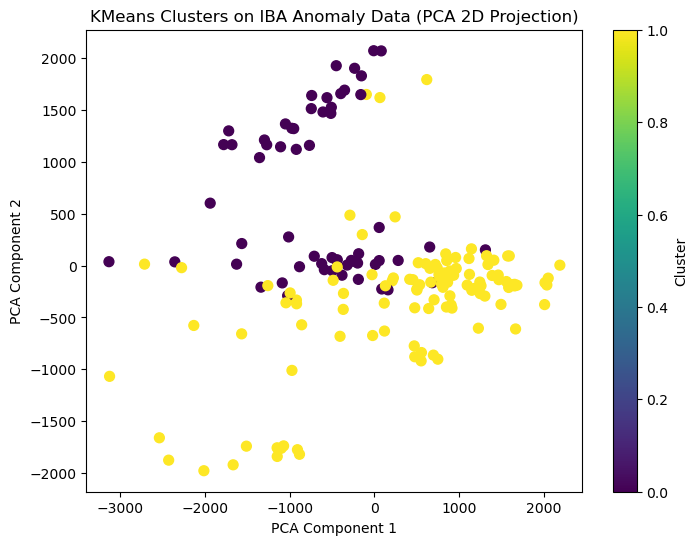

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load your CSV file
df = combined_df

feature_cols = [col for col in df.columns if col not in ['Coil ID', 'K means Cluster']]

# Extract feature matrix and cluster labels
X = df[feature_cols].values
clusters = df['K means Cluster'].values

# PCA for dimensionality reduction (to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot clusters with cluster labels as colors
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', s=50)
plt.title('KMeans Clusters on IBA Anomaly Data (PCA 2D Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.colorbar(scatter, label='Cluster')
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

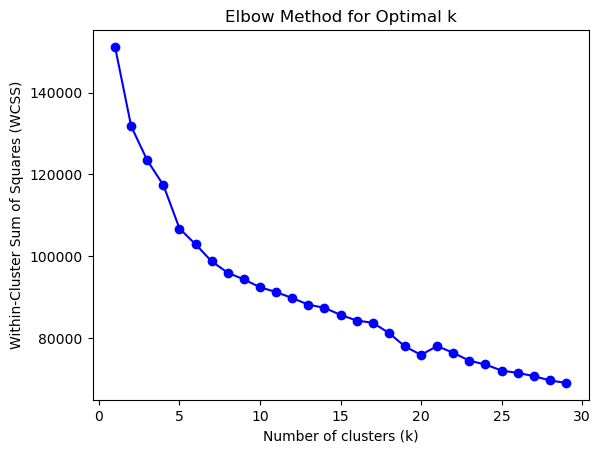

In [50]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Example: load your dataset
df = combined_df

# Select only numeric features for clustering
X = df.select_dtypes(include=["float64", "int64"]).values

# Standardize (recommended for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try different k values
wcss = []
K = range(1, 30)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(K, wcss, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.show()